In [11]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
df = pd.read_csv('2001-2023.csv', encoding='euc-kr')
df = df[['일시', '평균 수온(°C)']]

df['일시'] = pd.to_datetime(df['일시'])
# df.set_index('일시',inplace=True)

# 2001년은 제외한다. 앞에 첫달이 비어있음

In [2]:
# 삭제하려는 기간 설정
start_date = '2001-01-01'
end_date = '2001-12-31'
# 기간에 해당하는 월을 필터링하여 삭제
c_to_drop = (df['일시'] >= start_date) & (df['일시'] <= end_date)
df = df[~c_to_drop]
df.head()

,일시,평균 수온(°C)
214,2002-01-01,12.9
215,2002-01-02,12.2
216,2002-01-03,11.9
217,2002-01-04,11.7
218,2002-01-05,11.7


##### 중복 확인

In [3]:
df2= df[df.duplicated(subset=['일시'])]
print(df2)

             일시  평균 수온(°C)
7259 2023-11-15        NaN
7260 2023-11-16       16.1
7261 2023-11-17        NaN
7262 2023-11-18        NaN
7263 2023-11-19       16.9
7264 2023-11-20        NaN
7265 2023-11-21        NaN
7266 2023-11-22       16.2
7267 2023-11-23        NaN
7268 2023-11-24        NaN
7269 2023-11-25       15.6
7270 2023-11-26       15.5
7271 2023-11-27       15.6
7272 2023-11-28        NaN
7273 2023-11-29       14.8
7274 2023-11-30       14.6
7275 2023-12-01       14.5
7276 2023-12-02       14.3
7277 2023-12-03       15.6
7278 2023-12-04        NaN
7279 2023-12-05       16.4
7280 2023-12-06       16.2
7281 2023-12-07       15.3
7282 2023-12-08       14.8
7283 2023-12-09       15.4
7284 2023-12-10        NaN
7285 2023-12-11       15.3
7286 2023-12-12       15.3
7287 2023-12-13       14.6
7288 2023-12-14       14.4
7289 2023-12-15       14.4
7290 2023-12-16       14.2
7291 2023-12-17       13.6
7292 2023-12-18       13.3
7293 2023-12-19       13.1
7294 2023-12-20       13.2
7

##### 중복 인덱스 행을 확인하고 해당 행만 제거

In [4]:
df.drop(range(7257,7308), inplace=True)
df.head()
df2= df[df.duplicated(subset=['일시'])]
print(df2)
df.tail()

Empty DataFrame
Columns: [일시, 평균 수온(°C)]
Index: []


,일시,평균 수온(°C)
7252,2023-12-27,15.5
7253,2023-12-28,15.2
7254,2023-12-29,15.3
7255,2023-12-30,14.4
7256,2023-12-31,14.3


##### 결측치 확인

In [5]:
df.isnull().sum()

일시            0
평균 수온(°C)    91
dtype: int64

In [162]:
df.to_csv('EDA_ing.csv', index=False)

1. 없는 날짜까지 채운다.
- 2002-2024 까지의 데이터
- 2019-2024 까지의 데이터
2. 없는 날짜는 놔둔다. 결측치만 채운다.
- 2002-2024 까지의 데이터
- 2019-2024 까지의 데이터

## 1. 없는 날짜와 결측치를 채운 데이터

In [12]:
# # 시작 날짜와 종료 날짜 설정
# start_date = '2002-01-01'
# end_date = '2023-12-31'
df = pd.read_csv('EDA_ing.csv')

# '일시' 열을 날짜형으로 변환
df['일시'] = pd.to_datetime(df['일시'])

# 인덱스를 '일시' 열로 설정
df.set_index('일시', inplace=True)

# 모든 날짜를 포함하는 새로운 인덱스 생성
new_index = pd.date_range(start=df.index.min(), end=df.index.max())

# 기존 데이터프레임의 인덱스를 새로운 인덱스로 변경하고 누락된 날짜를 포함시킴
df = df.reindex(new_index)
## 앞 뒤 데이터 기울기로 채워넣음
df.interpolate(method='linear', inplace=True, limit_direction='both', limit_area='inside')



df.isnull().sum()

평균 수온(°C)    0
dtype: int64

중간 값 liner inter
df.interpolate(method='linear', inplace=True, limit_direction='both', limit_area='inside')
 
 SARIMAX
 SARIMA
 ARIMA
 ARIMAX

1. 있는경우 
2. 없는경우 경향성은 잡는데, 
채우는 방향으로 가자.
예측하는데 있어서 차이는 해보면 된다. 차이를 굳이 확인해보고 싶으면
올라가는 경향성을 신경망이 파악하면 알아서 파악한다.

로그 씌워주는건 수작업
NN이나 patch lstm같은경우 정상성 확보 안하고 그냥 가도 된다.

아리마에 넣을때만 이런 과정들이 많이 필요함.


In [13]:
# 2019년부터 2023년까지의 기간을 선택
start_date = '2002-01-01'
end_date = '2021-05-31'

# 데이터프레임 슬라이싱
df_subset = df[start_date:end_date]


In [18]:
# 2023년부터 2023년까지의 기간을 선택
start_date = '2016-01-01'
end_date = '2021-05-31'

# 데이터프레임 슬라이싱
df_subset2 = df[start_date:end_date]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


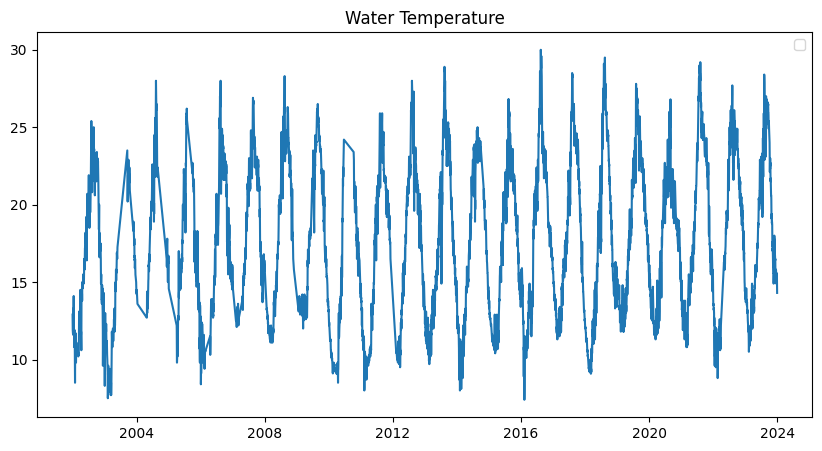

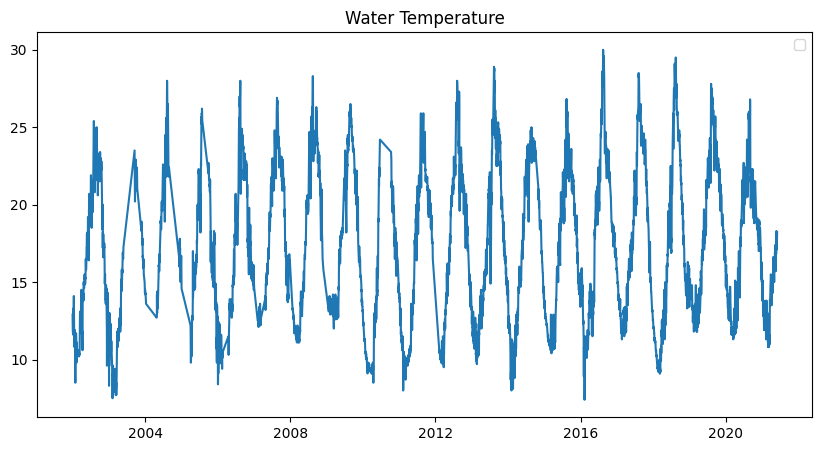

In [15]:
# 전체 기간 그래프
plt.figure(figsize=(10,5))
plt.plot(df.index[:], df[:])
plt.title('Water Temperature')
plt.legend()

plt.figure(figsize=(10,5))
plt.plot(df_subset.index[:], df_subset[:])
plt.title('Water Temperature')
plt.legend()

plt.show()

In [16]:
df_subset2.to_csv('2016-01-2021-05-31_all.csv', index=True)

In [17]:
# df.to_csv('2002-2024_all.csv', index=True)
df_subset.to_csv('2002-2021-05_all.csv', index=True)

# 2. 없는 날짜는 놔둔다. 결측치만 채운다.


In [153]:
# # 시작 날짜와 종료 날짜 설정
# start_date = '2002-01-01'
# end_date = '2023-12-31'
df = pd.read_csv('EDA_ing.csv')

# '일시' 열을 날짜형으로 변환
df['일시'] = pd.to_datetime(df['일시'])

# 인덱스를 '일시' 열로 설정
df.set_index('일시', inplace=True)

## 앞 뒤 데이터 기울기로 채워넣음
df.interpolate(method='linear', inplace=True, limit_direction='both', limit_area='inside')

df.isnull().sum()

평균 수온(°C)    0
dtype: int64

In [154]:
# 2019년부터 2023년까지의 기간을 선택
start_date = '2019-01-01'
end_date = '2023-12-31'

# 데이터프레임 슬라이싱
df_subset = df[start_date:end_date]


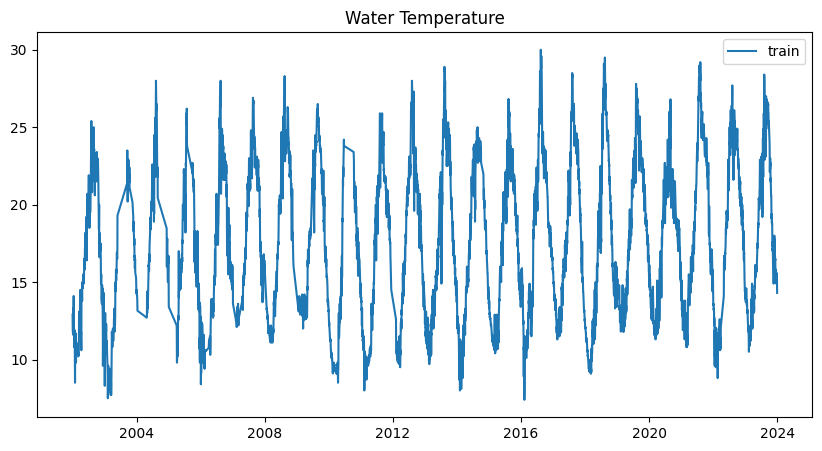

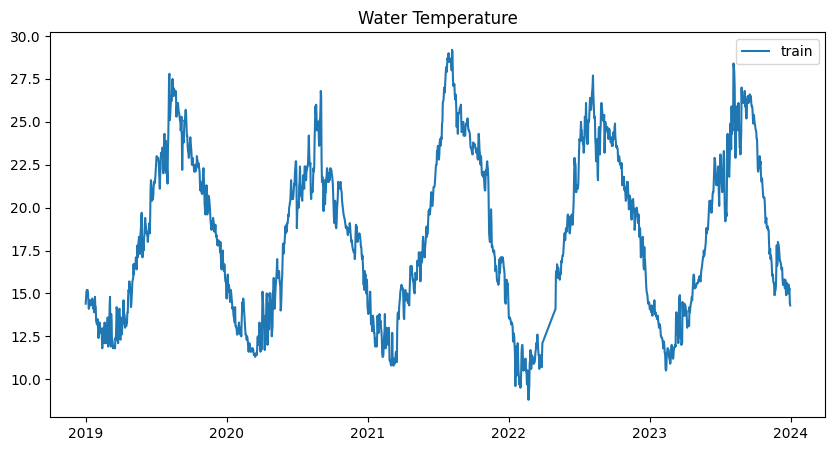

In [155]:
# 전체 기간 그래프
plt.figure(figsize=(10,5))
plt.plot(df.index[:], df[:])
plt.title('Water Temperature')
plt.legend()

plt.figure(figsize=(10,5))
plt.plot(df_subset.index[:], df_subset[:])
plt.title('Water Temperature')
plt.legend()

plt.show()

In [156]:
df.to_csv('2002-2024_Not_all.csv', index=True)
df_subset.to_csv('2019-2024_Not_all.csv', index=True)

# 여기부터 전처리 동시 시작


##### 기본 전처리 이 구성은 바로 꼭 해주길
##### 이형태에서 read 불러오는 파일만 다르면 모두 동일하게 작동함

In [209]:
df = pd.read_csv('2002-2024_all.csv')
df.head()
df['일시'] = df['Unnamed: 0']
df = df.drop(columns='Unnamed: 0')
df['일시'] = pd.to_datetime(df['일시'])

In [210]:
pd.options.display.float_format = None  # 기본값으로 되돌림
df.head()


,평균 수온(°C),일시
0,12.9,2002-01-01
1,12.2,2002-01-02
2,11.9,2002-01-03
3,11.7,2002-01-04
4,11.7,2002-01-05


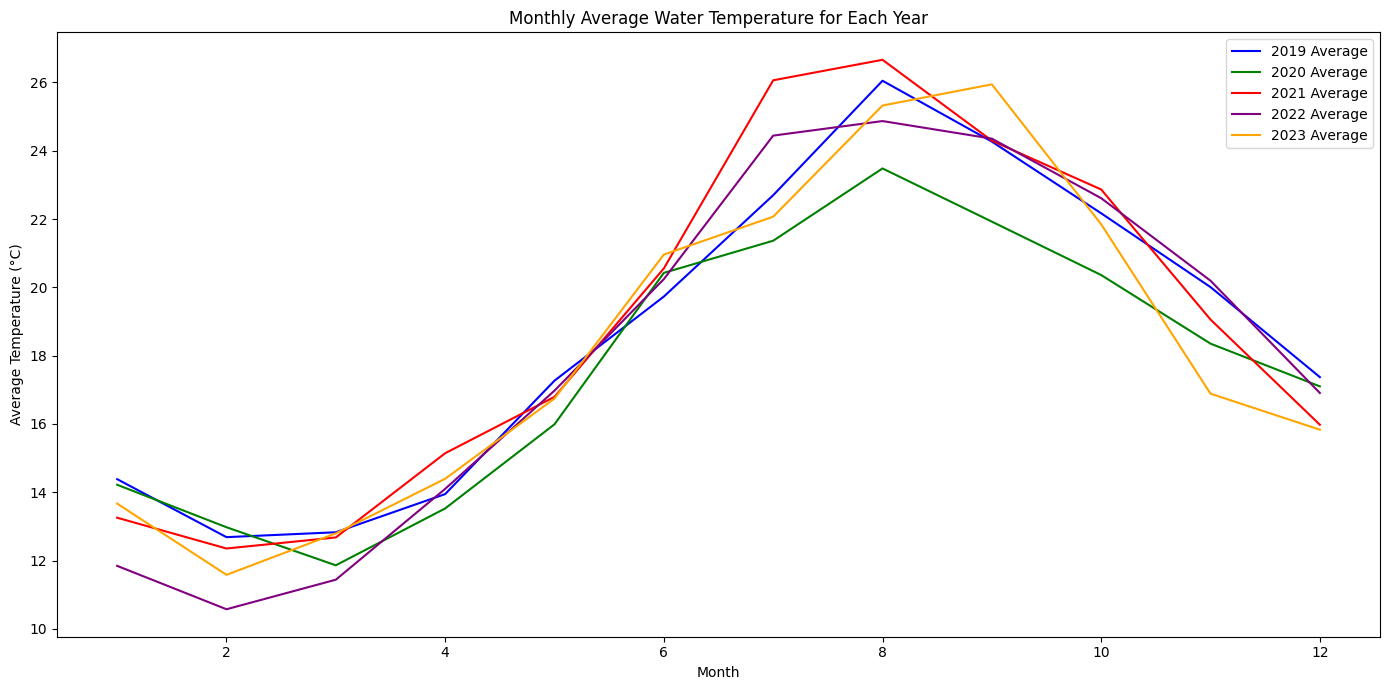

In [188]:
# Extract year and month from the date
df['년'] = df['일시'].dt.year
df['월'] = df['일시'].dt.month

# Calculate the monthly average for each year
monthly_avg = df.groupby(['년', '월'])['평균 수온(°C)'].mean().unstack(level=0)

# Get unique years to plot for each
years = df['년'].unique()

# Define colors to cycle through - one for each year
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

plt.figure(figsize=(14, 7))

# Plot each year with its average
for i, year in enumerate(years):
    plt.plot(monthly_avg.index, monthly_avg[year], color=colors[i % len(colors)], label=f'{year} Average')

plt.title('Monthly Average Water Temperature for Each Year')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()

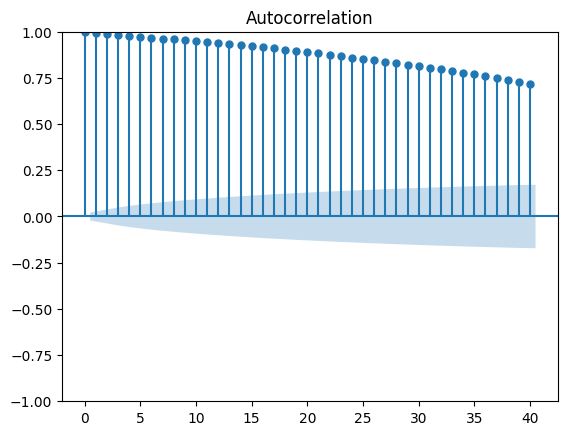

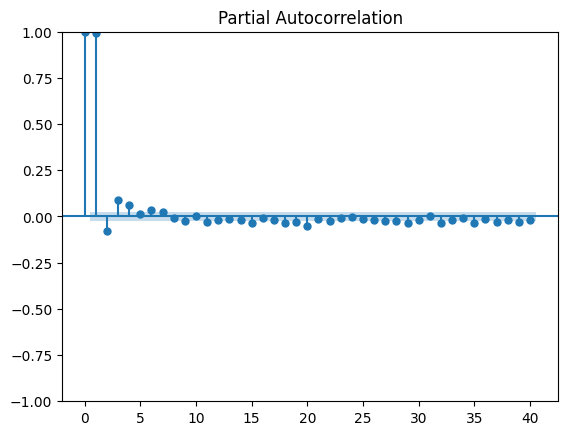

In [213]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['평균 수온(°C)'])  # ACF plot
plot_pacf(df['평균 수온(°C)'])  # PACF plot
plt.show()

In [211]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['평균 수온(°C)'], autolag="AIC")

dfoutput=pd.Series(dftest[0:4], index=['Test_statistic','p-value','#lags-used','number_of_obs used'])
for key ,value in dftest[4].items():
    dfoutput['critical value (%s)' %key]=value

print(dfoutput)


Test_statistic         -7.435046e+00
p-value                 6.215200e-11
#lags-used              3.600000e+01
number_of_obs used      7.998000e+03
critical value (1%)    -3.431168e+00
critical value (5%)    -2.861901e+00
critical value (10%)   -2.566962e+00
dtype: float64
